In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import codecs
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['savefig.dpi'] = 150
%matplotlib inline
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [2]:
# select language from: de, es, pt_br
language = "pt_br"

In [3]:
lyrics_folder = "data/%s" % language
url = "https://raw.githubusercontent.com/hermitdave/FrequencyWords/master/content/2016/%s/%s_full.txt" % (language, language)

In [4]:
is_word = lambda s: not s in list(".¿!?(),;-:")+["..."] # TODO make scaleable...
songs = filter(lambda s: not s.startswith('.'), os.listdir(lyrics_folder))
bags = dict([(s,set(filter(is_word, map(str.lower,tokenizer.tokenize(codecs.open(lyrics_folder+os.sep+s,encoding='utf-8').read()))))) for s in songs])

## Which songs require the least effort to learn?

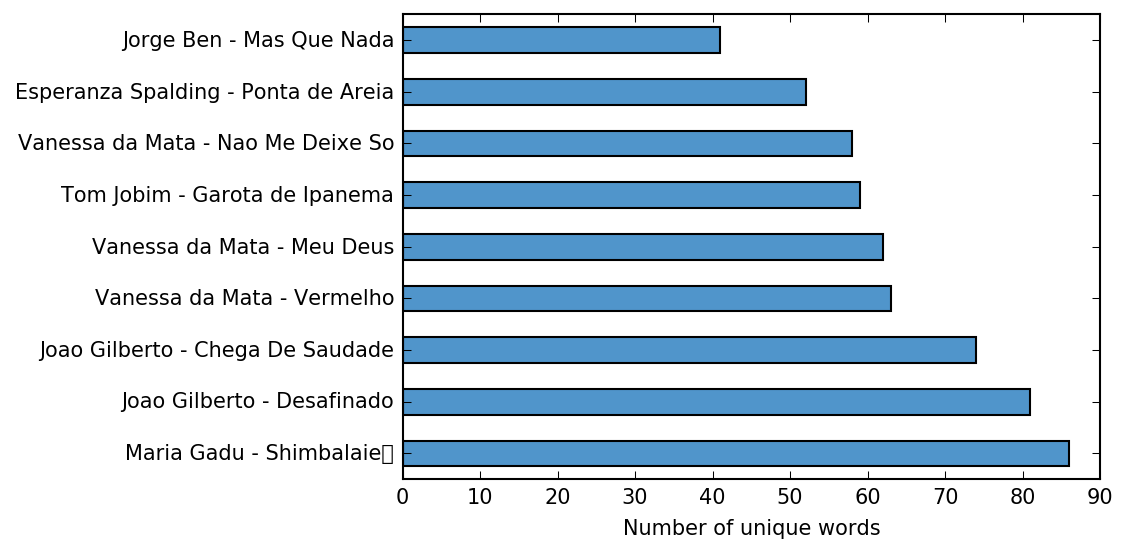

In [5]:
data = [(k,len(v)) for (k,v) in bags.items()]
num_words = pd.DataFrame(data,columns=["song","num_words"]).set_index("song").num_words
ax = num_words.sort_values(ascending=False).plot(kind="barh",color='#5095CB')
ax.set_xlabel("Number of unique words");
ax.set_ylabel("");

In [6]:
# TODO: Update to use URL
freqs = pd.read_csv(url, sep=" ",header=None,encoding="utf-8")
freqs.columns = ["word","num"]
freqs["word"] = freqs["word"].map(str)
freqs = freqs.set_index("word").num.rank(ascending=False).map(round).map(int)

In [7]:
word_ranks = [(k,pd.Series(map(lambda k: freqs.get(k,np.nan),bags[k]))) for k in bags.keys()]
medians = [(k,v.median()) for (k,v) in word_ranks]
word_median = pd.DataFrame(medians,columns=["song","word_median"]).set_index("song").word_median

## Which songs are least advanced?

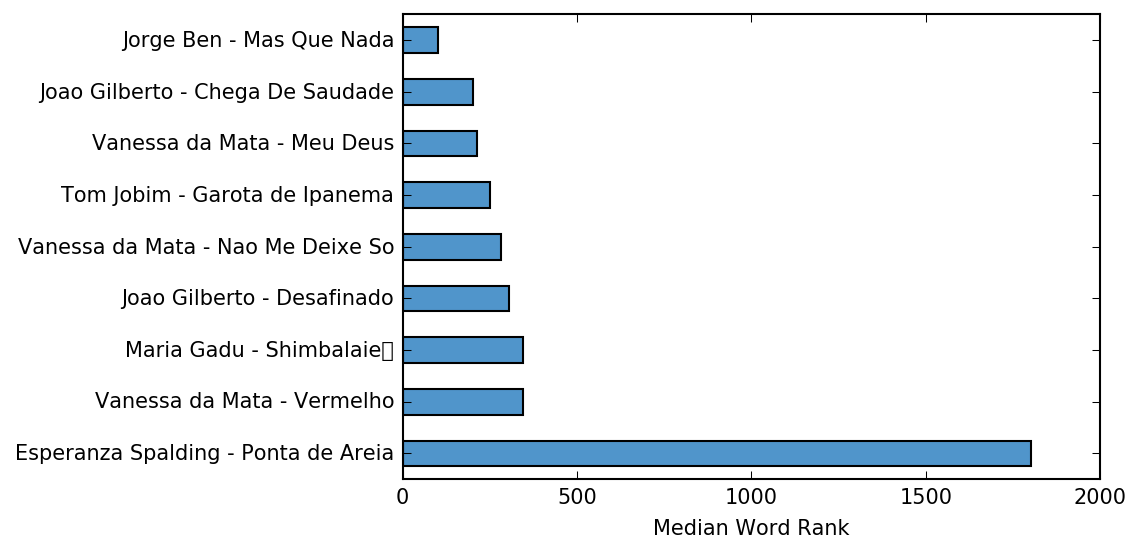

In [8]:
ax = word_median.sort_values(ascending=False).plot(kind="barh",color='#5095CB')
ax.set_xlabel("Median Word Rank");
ax.set_ylabel("");

## Plot songs in 2x2 matrix: effort x advancedness

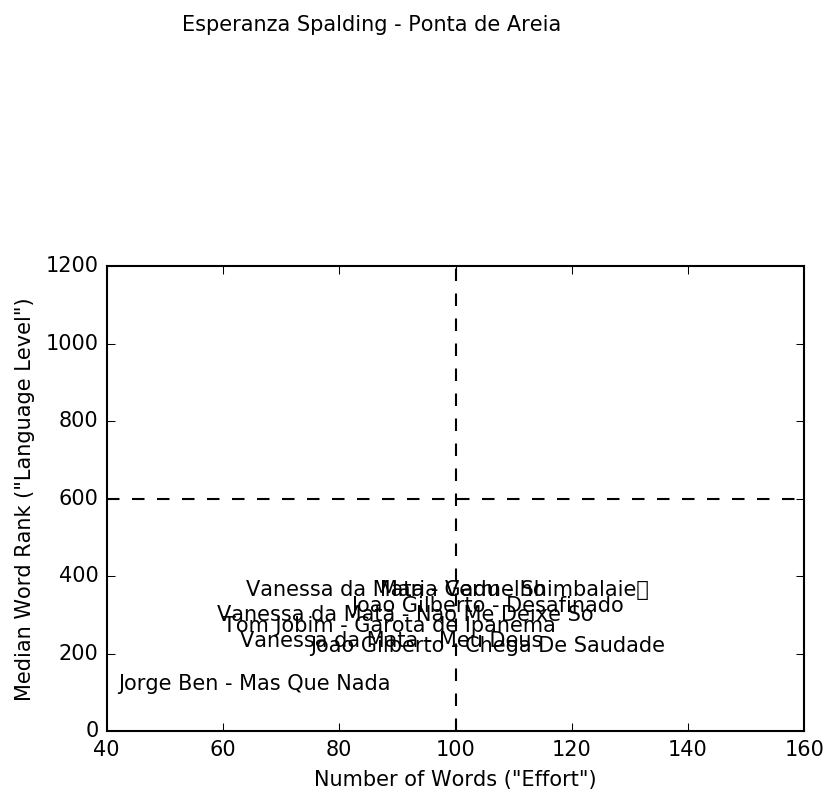

In [9]:
plt.plot(num_words,word_median,"w.",)

num_words_min = 40
num_words_max = 160
num_words_split = (num_words_max + num_words_min) / 2

median_words_min = 0
median_words_max = 1200
median_words_split = (median_words_max + median_words_min) / 2

plt.xlim(num_words_min, num_words_max)
plt.ylim(median_words_min,median_words_max)
for i in range(len(num_words)):
    plt.text(num_words.ix[i]+1,word_median.ix[i]+5,word_median.index[i],fontdict={"fontsize":10})
plt.xlabel('Number of Words ("Effort")')
plt.ylabel('Median Word Rank ("Language Level")')
plt.plot([num_words_split, num_words_split],[median_words_min, median_words_max],'k--'); # vertical line
plt.plot([num_words_min, num_words_max],[median_words_split, median_words_split],'k--'); # horizontal line